# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 5/5/2023
* Student Name: Eashan Kaw
* Student Net ID: elk7ed
* This URL: https://github.com/elkaw/monte/Ekaw_FinalProject.ipynb
* GitHub Repo URL: https://github.com/elkaw/monte/

# The Monte Carlo Module

In [42]:
import numpy as np
import pandas as pd


class Die:
    """
        A die has N sides, or “faces”, and W weights, and can be rolled to select a face.
            -W defaults to 1.0 for each face but can be changed after the object is created.
            -Note that the weights are just numbers, not a normalized probability distribution.
            -The die has one behavior, which is to be rolled one or more times.
            -Note that what we are calling a “die” here can be any discrete
             random variable associated with a stochastic process, such as
            using a deck of cards or flipping a coin or speaking a language.
            - Our probability model for such variable is, however, very simple
            – since our weights apply to only to single events, we are assuming that the events are independent.
            This makes sense for coin tosses but not for language use.
    """
    _faces = np.array([1.0], dtype=np.float)
    _w = np.array([1.0], dtype=np.float)
    _dice = pd.DataFrame({"face": [_faces], "weight": [_w]})

    def __init__(self, faces):
        """
        This function will initialize a "dice"
        which defines a space of outcomes and the probability of each one happening

        INPUT:
            faces: numpy array of strings or numbers which represents a possible outcome of a dice

        OUTPUT:
            Updates the dataframe attribute that represents the dice
        """
        self._faces = faces
        if self._faces.dtype in (np.short, np.ushort, np.intc, np.uintc, np.int_, np.uint, np.longlong, np.ulonglong,
                                 np.float16, np.float, np.cfloat, np.single, np.double, np.longdouble, np.float64,
                                 np.int64, np.string_, np.str)\
                or self._faces.dtype.type in (np.string_, np.str_) or self._faces.dtype.kind in ('f', 'i', 'u', 'S', 'U'):

            self._w = np.array([1 for i in faces.tolist()], dtype=np.float32)
            self._dice = pd.DataFrame({"face": self._faces.tolist(), "weight": self._w.tolist()}, index=list(range(len(self._faces.tolist
                                                                                                                       ()))))
            if self._faces.dtype.type in (np.string_, np.str_) or self._faces.dtype.kind in ('S', 'U'):
                self._dice['face'] = self._dice['face'].astype('string')
        else:
            print("Please pass a numerical or string dtype numpy array")

    def change_weight(self, face, weight):
        """
        This function will change the weight of a the passed dice face to be the argument passed into the function

        INPUT:
            face: identifies the face that should have its weight changed
            weight: desired weight

        OUTPUT:
            The dice attribute will be updated to reflect the desired face-weight combination

        """
        if self._dice[self._dice['face'] == face].shape[0] > 0:
            if type(weight) == int or type(weight) == float:
                self._dice.loc[self._dice['face'] == face, "weight"] = float(weight)
            elif type(weight) == str:
                if weight.isnumeric() or weight.replace('.', '', 1).isdigit():
                    self._dice.loc[self._dice['face'] == face, "weight"] = float(weight)
                else:
                    print("Weight not numerical, please enter a numerical weight")
            else:
                print("Weight not numerical, please enter a numerical weight")
        else:
            print("Face value not in dictionary")

    def roll(self, roll_count=1):
        """
        Chooses faces based on the probability weights. Returns the number of faces defined in roll_count in a list.

        INPUT:
            rollCount: number of faces to return (number of rolls)

        OUTPUT:
            outcomes: list of results with the result count = rowCount parameter
        """
        outcomes = []
        for i in range(roll_count):
            outcomes.append(self._dice.sample(n=1, weights=self._dice['weight'].to_numpy())['face'].values[0])
        return outcomes

    def show(self):
        """
        Returns the faces, weights dice dataframe
        OUTPUT:
            dice: faces, weight dataframe
        """

        return self._dice


class Game:
    """
        A game consists of rolling of one or more dice of the same kind one or more times.
        Each game is initialized with one or more of similarly defined dice (Die objects).
        By “same kind” and “similarly defined” we mean that each die in a given game has...
        the same number of sides and associated faces,
        but each die object may have its own weights.
        The class has a behavior to play a game, i.e. to rolls all of the dice a given number of times.
        The class keeps the results of its most recent play.
    """

    _dice_list = []
    _dice_rolls = None

    def __init__(self, dice_list):
        """
        Takes a single parameter, a list of already instantiated similar Die objects.

        INPUT:
            dice_list: list of dice objects that will be rolled
        """
        self._dice_list = dice_list

    def play(self, roll_count):
        """
            Takes a parameter to specify how many times the dice should be rolled.
            Saves the result of the play to a private dataframe of shape N rolls by M dice.
            The private dataframe should have the roll number is (as) a named index.
            This results in a table of data with columns for roll number, the die number (its list index),
            and the face rolled in that instance.

            INPUT:
                rollCount: Number of rolls for all di(c)e
        """
        self._dice_rolls = pd.DataFrame(columns=[str(i+1) for i in range(len(self._dice_list))])
        self._dice_rolls['roll_number'] = [i+1 for i in range(roll_count)]
        self._dice_rolls.set_index('roll_number',inplace=True)
        self._dice_rolls.index.name = 'roll_number'
        dice_number = 1
        for dice in self._dice_list:
            self._dice_rolls[str(dice_number)] = dice.roll(roll_count)
            dice_number = dice_number + 1

    def show(self, wide=True):
        """
        A method to show the user the results of the most recent play.
        This method just passes the private dataframe to the user.
        Takes a parameter to return the dataframe in narrow or wide form.
        This parameter defaults to wide form.
        This parameter should raise an exception of the user passes an invalid option.
        The narrow form of the dataframe will have a two column index with the roll number and the die number,
        and a column for the face rolled.
        The wide form of the dataframe will a single column index with the roll number, and each die number as a column.
        INPUT
            wide: True returns a dataframe which each row as a series of face values of all di(c)e rolled, False
            returns a dataframe where each row is a value for an individual di(c)e

        OUTPUT
            dice_rolls:
        """
        try:
            if wide:
                return self._dice_rolls
            else:
                self._dice_rolls.reset_index(inplace=True)
                melted_frame = pd.melt(self._dice_rolls, id_vars='roll_number', var_name='dice_number_or_id', value_name='face_value', ignore_index=True)
                #melted_frame. reset_index(inplace=True))
                melted_frame['roll_number'] = melted_frame['roll_number'].astype(int)
                melted_frame.set_index(['roll_number', 'dice_number_or_id'], inplace=True)
                melted_frame.sort_values(['roll_number', 'dice_number_or_id', 'face_value'], ascending=True, inplace=True)
                self._dice_rolls.set_index('roll_number', inplace=True)
                return melted_frame
        except TypeError:
            print("Please pass a boolean (True or False) or a 1 or 0 for the wide argument")


class Analyzer:
    """
    An analyzer takes the results of a single game and computes various
    descriptive statistical properties about it. These properties results are
    available as attributes of an Analyzer object. Attributes (and associated methods) include:
        -A face counts per roll, i.e. the number of times a given face
        appeared in each roll. For example, if a roll of five dice has all
        sixes, then the counts for this roll would be 6 for the face value '6' and 0 for the other faces.
        - A jackpot count, i.e. how many times a roll resulted in all faces being the same,
        e.g. all one for a six-sided die.
        - A combo count, i.e. how many combination types of faces were rolled and their counts.

    """
    _game = None
    jackpot_df = None
    combo_df = None
    face_counts_per_roll_df = None
    _faces = None
    die_face_type = None

    def __init__(self, game):
        """
        Takes a game object as its input parameter.
        At initialization time, it also infers the data type of the di(c)e faces used.

        INPUT:
        game: a completed game with one or more dice rolls with one or multiple di(c)e
        """
        self._faces = game._dice_list[0]._faces
        die_face_type = type(self._faces)
        self._game = game

    def jackpot(self):
        """"
        A jackpot method to compute how many times the game resulted in all faces being identical.
            -Returns an integer for the number times to the user.
            -Stores the results as a dataframe of jackpot results in a public attribute.
            -The dataframe should have the roll number as a named index.
        """

        game_results_df = self._game.show(wide=False)
        game_results_df.reset_index(inplace=True)
        game_results_df_reduced = game_results_df[['roll_number', 'face_value']]
        game_results_df_count_summary = game_results_df_reduced.groupby(game_results_df_reduced["roll_number"]).agg(face_value=('face_value','nunique')).reset_index()
        game_results_df_wide = self._game.show(wide=True).reset_index()
        self.jackpot_df = game_results_df_wide[game_results_df_wide['roll_number'].isin(game_results_df_count_summary[game_results_df_count_summary['face_value']==1]['roll_number']) ]
        self.jackpot_df.set_index("roll_number", inplace=True)
        self.jackpot_df.index.name = "roll_number"
        return self.jackpot_df.shape[0] # game_results_df[['roll_number', 'face_value']].groupby("roll_number").agg({'face_value':'nunique'}).reset_index().shape[0]

    def combo(self):
        """
        A combo method to compute the distinct combinations of faces rolled, along with their counts.
            - Combinations should be sorted and saved as a multi-columned index.
            - Stores the results as a dataframe in a public attribute.
        """
        game_results_df = self._game.show(wide=True)
        game_results_df.reset_index(inplace=True)
        columns = [ col for col in game_results_df.columns.values.tolist() ] #if col not in ['face_value', 'roll_number']
        game_results_df = game_results_df[columns]
        dice_name_columns = [col for col in columns if col != "roll_number"]
        game_results_combo_count = game_results_df.groupby(dice_name_columns).agg(count=('roll_number','count'))
        game_results_combo_count.reset_index(inplace=True)
        #game_results_combo_count.sort_values('count', ascending=False, inplace=True)
        game_results_combo_count_sorted = game_results_combo_count.set_index(dice_name_columns)
        self.combo_df = game_results_combo_count_sorted.sort_index(level=sorted(dice_name_columns))

    def face_counts_per_roll(self):
        """
        A face counts per roll method to compute how many times a given face is rolled in each event.
            - Stores the results as a dataframe in a public attribute.
            - The dataframe has an index of the roll number and face values as columns (i.e. it is in wide format).
        """
        game_results_df_long = self._game.show(wide=False)
        game_results_df_long.reset_index(inplace=True)
        roll_face_value_count_summary = game_results_df_long.\
            groupby(['roll_number', 'face_value']).agg(count=("dice_number_or_id", 'count'))
        roll_face_value_count_summary.reset_index(inplace=True)
        roll_number_list = self._game.show(wide=True).index.values.tolist()
        self.face_counts_per_roll_df = pd.DataFrame(data={**{face:["" for i in roll_number_list] for face in self._faces},**{"roll_number": roll_number_list}})
        self.face_counts_per_roll_df.reset_index( inplace=True)
        self.face_counts_per_roll_df.set_index('roll_number', inplace=True)
        for face_value in self._faces:
            for j in self.face_counts_per_roll_df.index.values.tolist():
                if int(roll_face_value_count_summary[(roll_face_value_count_summary['roll_number']==j) & (roll_face_value_count_summary['face_value'] == str(face_value))]["count"].shape[0]) == 0:
                    self.face_counts_per_roll_df.at[j, str(face_value)] = 0
                else:
                    self.face_counts_per_roll_df.at[j, str(face_value)] = roll_face_value_count_summary[(roll_face_value_count_summary.index.isin([j])) & (roll_face_value_count_summary["face_value"] == str(face_value))]["count"]
                    #self.face_counts_per_roll_df.drop("index", inplace=True)
        self.face_counts_per_roll_df.reset_index(inplace=True)
        self.face_counts_per_roll_df.drop("index", inplace=True, axis=1)
        self.face_counts_per_roll_df.set_index("roll_number", inplace=True, )

# Test Module

In [43]:
# A code block with your test code.
import unittest as u
from unittest.mock import patch
import numpy as np
import pandas as pd
from io import StringIO
from montecarlo import Game
from montecarlo import Analyzer


class MontecarloSuite(u.TestCase):

    def test_1_change_weight(self):
        """
            Tests whether the weight change works by forcing the outcome
            to be 3 as opposed to a default fair 6-sided die
        """
        dice = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        dice.change_weight(1, 0)
        dice.change_weight(2, 0)
        dice.change_weight(4, 0)
        dice.change_weight(5, 0)
        dice.change_weight(6, 0)
        self.assertEqual(dice.roll()[0], 3)

    def test_2_change_weight_float(self):
        """
            Tests whether a float weight parameter is accepted
        """
        dice = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        dice.change_weight(1, 0.0)
        self.assertEqual(0.0, dice.show()[dice.show()['face'] == 1]['weight'].values[0])

    def test_3_change_weight_int(self):
        """3
            Tests whether a int weight parameter is accepted and returns float
        """
        dice = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        dice.change_weight(1, 0)
        self.assertEqual(0.0, dice.show()[dice.show()['face'] == 1]['weight'].values[0])

    def test_4_change_weight_num_string(self):
        """
            Tests whether a numerical weight parameter is accepted
        """
        dice = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        dice.change_weight(1, '0.0')
        self.assertEqual(0.0, dice.show()[dice.show()['face'] == 1]['weight'].values[0])

    def test_5_change_weight_nonnum_string(self):
        """
            Tests whether a numeriacl weight parameter is rejected
        """
        dice = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        with patch('sys.stdout', new=StringIO()) as fake_out:
            dice.change_weight(1, 'notanumricalstring')
            self.assertEqual(fake_out.getvalue(), "Weight not numerical, please enter a numerical weight\n")

    def test_6_change_weight_rejects_face(self):
        """
            Tests whether a change weight rejects a face outside the Diue
        """
        dice = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        with patch('sys.stdout', new=StringIO()) as fake_out:
            dice.change_weight(13, 0)
            self.assertEqual(fake_out.getvalue(), "Face value not in dictionary\n")

    def test_7_roll_twice(self):
        """
            Tests whether the roll(2) method produces two outputs
        """
        dice = Die(np.array(['H', 'T'], dtype=np.str_))
        dice.change_weight('T', 0)
        self.assertEqual(dice.roll(2), ['H', 'H'])

    def test_8_roll_three_times(self):
        """
            Tests whether the roll(3) method produces two outputs
        """
        dice = Die(np.array(['H', 'T'], dtype=np.str_))
        dice.change_weight('T', 0)
        self.assertEqual(len(dice.roll(3)), 3)

    def test_9_show_die(self):
        """
            Tests show returns the _dice object
        """
        dice = Die(np.array(['H', 'T'], dtype=np.str_))
        self.assertEqual(True, dice._dice.equals(dice.show()))

    def test_10_game_init(self):
        """
            Test whether the game initializer successfully sets the dice list variable
        """
        game = Game([Die(np.array(['H', 'T'], dtype=np.str_)), Die(np.array(['H', 'T'], dtype=np.str_))])
        self.assertEqual(game._dice_list[0]._faces.tolist(), ['H', 'T'])
        self.assertEqual(game._dice_list[0]._w.tolist(), [1.0, 1.0])

    def test_11_play_values(self):
        """
            Test whether the game play function successfully sets the dice list variable
        """
        d1 = Die(np.array(['H', 'T'], dtype=np.str_))
        d1.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('H', 0.0)
        game = Game([d1, d2])
        game.play(2)
        self.assertEqual([['H', 'T'], ['H', 'T']], game._dice_rolls.values.tolist())

    def test_12_play_index_column(self):
        """
            Test whether the game play function includes the dice numbers as columns
        """
        d1 = Die(np.array(['H', 'T'], dtype=np.str_))
        d1.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('H', 0.0)
        game = Game([d1, d2])
        game.play(2)
        self.assertEqual([1, 2], game._dice_rolls.index.values.tolist())

    def test_13_play_column_name(self):
        """
            Test whether the game play function successfully sets the dice list variable
        """
        d1 = Die(np.array(['H', 'T'], dtype=np.str_))
        d1.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('H', 0.0)
        game = Game([d1, d2])
        game.play(2)
        self.assertEqual(['1', '2'], game._dice_rolls.columns.values.tolist())

    def test_14_play_column_name(self):
        """
            Test whether the game play function column is named correctly
        """
        d1 = Die(np.array(['H', 'T'], dtype=np.str_))
        d1.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('H', 0.0)
        game = Game([d1, d2])
        game.play(2)
        self.assertEqual('roll_number', game._dice_rolls.index.name)

    def test_15_game_show_wide(self):
        """
            Test whether the game show method returns a wide dataframe with roll-game results when wide = 1, True, or default
            The model and result dataframe should look like below
            Index           1      2
            _____
            roll_number
            int           face data type (str here)
            1               'H'    'T'
            2               'H'    'T'

        """
        d1 = Die(np.array(['H', 'T'], dtype=np.str_))
        d1.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('H', 0.0)
        game = Game([d1, d2])
        game.play(2)
        wide_df = pd.DataFrame({'1': ['H', 'H'], '2': ['T', 'T']}, index=[1, 2])
        wide_df.index.name = 'roll_number'
        wide_df['1'] = wide_df['1'].astype('str')
        wide_df['2'] = wide_df['2'].astype('str')
        pd.testing.assert_frame_equal(game.show(wide=1), wide_df, check_names=True, check_index_type=True,
                                      check_column_type=True)
        pd.testing.assert_frame_equal(game.show(wide=True), wide_df, check_names=True, check_index_type=True,
                                      check_column_type=True)
        pd.testing.assert_frame_equal(game.show(1), wide_df, check_names=True, check_index_type=True,
                                      check_column_type=True)

    def test_16_game_show_narrow(self):
        """
            Test whether the game show method returns a narrow dataframe with roll-game results when wide = 0 or False
            The model and result dataframe should look like below

            Index
            _______________________________      face_value
            roll_number  dice_number_or_id        face value of input die (str here)
            int               str
            1                  1                      H
            1                  2                      T
            2                  1                      H
            3                  2                      T

        """
        d1 = Die(np.array(['H', 'T'], dtype=np.str_))
        d1.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('H', 0.0)
        game = Game([d1, d2])
        game.play(2)
        narrow_df = pd.DataFrame({'roll_number': [1, 1, 2, 2], 'dice_number_or_id': ['1', '2', '1', '2'],
                                  'face_value': ['H', 'T', 'H', 'T']})
        narrow_df['roll_number'] = narrow_df['roll_number'].astype(int)
        narrow_df['dice_number_or_id'] = narrow_df['dice_number_or_id'].astype(str)
        narrow_df['face_value'] = narrow_df['face_value'].astype(str)
        narrow_df.set_index(['roll_number', 'dice_number_or_id'], inplace=True)
        pd.testing.assert_frame_equal(game.show(wide=0), narrow_df, check_names=True, check_index_type=True,
                                      check_column_type=True)
        pd.testing.assert_frame_equal(game.show(wide=False), narrow_df, check_names=True, check_index_type=True,
                                      check_column_type=True)

    def test_17_catch_exception_in_game_show(self):
        """
            Test whether non-boolean/binary/default input argument to wide returns a typeerror exception
        """
        d1 = Die(np.array(['H', 'T'], dtype=np.str_))
        d1.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('H', 0.0)
        game = Game([d1, d2])
        self.assertRaises(TypeError, game.show(wide="banana"))

    def test_18_analyzer_init(self):
        """
            Test whether the analyzer object includes the expected di(c)e
        """
        d1 = Die(np.array(['H', 'T'], dtype=np.str_))
        d1.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('H', 0.0)
        game = Game([d1, d2])
        game.play(2)
        analyzer_bot = Analyzer(game)
        self.assertEqual([d1, d2], analyzer_bot._game._dice_list)

    def test_19_jackpot_count(self):
        """
            Test that the jackpot method accurately calculates jackpots
            Create two loaded di(c)e that always produce heads, roll twice, yielding two jackpots
        """
        d1 = Die(np.array(['H', 'T'], dtype=np.str_))
        d1.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('T', 0.0)
        game = Game([d1, d2])
        analyzer_bot = Analyzer(game)
        game.play(2)
        self.assertEqual(2, analyzer_bot.jackpot())

    def test_20_jackpot_df(self):
        """
            Test that the jackpot method saves the jackpot values in a wide dataframe
            Roll a 6 sided dice a ton of times and check that each row has min value = max value
        """
        d1 = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        d2 = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        d3 = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        d4 = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        d5 = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        d6 = Die(np.array([1, 2, 3, 4, 5, 6], dtype=np.int64))
        game = Game([d1, d2, d3, d4, d5, d6])
        game.play(100)
        analyzer_bot = Analyzer(game)
        analyzer_bot.jackpot()
        wide_results = game.show(wide=1).sort_index()
        not_jackpot_df = wide_results[~((wide_results['1'] == wide_results['2'])
                                        & (wide_results['2'] == wide_results['3']) & (
                                                    wide_results['3'] == wide_results['4'])
                                        & (wide_results['4'] == wide_results['5']) & (
                                                    wide_results['5'] == wide_results['6']))]
        reconstituted_wide_results = pd.concat([analyzer_bot.jackpot_df, not_jackpot_df]).sort_index()
        pd.testing.assert_frame_equal(wide_results, reconstituted_wide_results, check_names=True, check_index_type=True,
                                      check_column_type=True)
        self.assertEqual('roll_number', analyzer_bot.jackpot_df.index.name)

    def test_22_combo(self):
        """
        Test that a dataframe with dupliates becomes unique and with count of duplicates when combo function is applied
        Example below is a dataframe with three heads becomes one with 1 head and a count of 3
        """
        d1 = Die(np.array(['H', 'T'], dtype=np.str_))
        d1.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('T', 0.0)
        d3 = Die(np.array(['H', 'T'], dtype=np.str_))
        d3.change_weight('T', 0.0)
        game = Game([d1, d2, d3])
        game.play(3)
        analyzer_bot = Analyzer(game)
        model_df = pd.DataFrame({'1': ['H'], '2': ['H'], '3': ['H'], 'count': [3]})
        model_df.set_index(['1', '2', '3'], inplace=True)
        model_df.index.name = 'roll_number'
        analyzer_bot.combo()
        pd.testing.assert_frame_equal(model_df, analyzer_bot.combo_df, check_names=True, check_index_type=True,
                                      check_column_type=True)

    def test_23_face_counts_per_roll(self):
        """
        Test that the reported face counts are consistent with the results of the game
        Model will be
                       H      T
        roll_number
        int           int    int
        1              3      0
        2              3      0
        3              3      0

        """
        d1 = Die(np.array(['H', 'T'], dtype=np.str_))
        d1.change_weight('T', 0.0)
        d2 = Die(np.array(['H', 'T'], dtype=np.str_))
        d2.change_weight('T', 0.0)
        d3 = Die(np.array(['H', 'T'], dtype=np.str_))
        d3.change_weight('T', 0.0)
        game = Game([d1, d2, d3])
        game.play(3)
        analyzer_bot = Analyzer(game)
        model_df = pd.DataFrame({'H': [3, 3, 3], 'T': [0, 0, 0], 'roll_number': [1, 2, 3]}, dtype=object)
        model_df.set_index('roll_number', inplace=True)
        analyzer_bot.face_counts_per_roll()
        pd.testing.assert_frame_equal(model_df, analyzer_bot.face_counts_per_roll_df, check_names=True,
                                      check_index_type=True, check_column_type=True)


#if __name__ == '__main__':
#    u.main(verbosity=3)




# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

hello
hello
['IN METHOD DICE LIST', <montecarlo.Die object at 0x126b0ea90>]
H
['IN METHOD DICE LIST', <montecarlo.Die object at 0x126b4c130>]
T
1000
1000


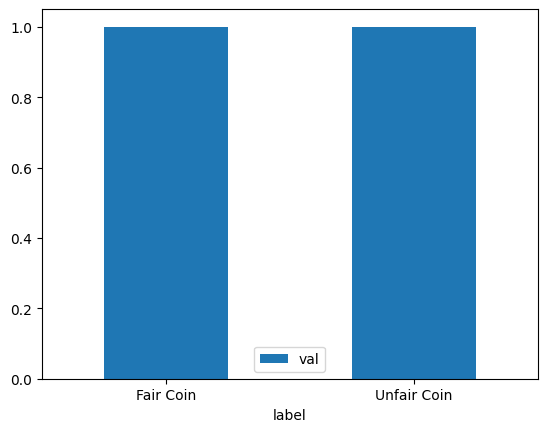

In [44]:
# Code blocks with output
from montecarlo import Die
fair_coin = Die(np.array(['H', 'T'], dtype=np.str_))
unfair_coin = Die(np.array(['H', 'T'], dtype=np.str_))
unfair_coin.change_weight('H',5.0)
fair_game = Game([fair_coin])
unfair_game = Game([unfair_coin])
fair_game.play(1000)
unfair_game.play(1000)
fair_analyzer = Analyzer(fair_game)
unfair_analyzer = Analyzer(unfair_game)
fair_jackpoint_count = fair_analyzer.jackpot()
print(fair_jackpoint_count)
unfair_jackpoint_count = unfair_analyzer.jackpot()
print(unfair_jackpoint_count)
fair_jackpot_percentage = fair_jackpoint_count/1000
unfair_jackpot_percentage = unfair_jackpoint_count/1000
df = pd.DataFrame({'label':['Fair Coin', 'Unfair Coin'], 'val':[fair_jackpot_percentage,unfair_jackpot_percentage]})
ax = df.plot.bar(x='label', y='val', rot=0)

## Scenario 2

In [47]:
print(unfair_analyzer.combo_df)

None


Face value not in dictionary
Face value not in dictionary
['IN METHOD DICE LIST', <montecarlo.Die object at 0x126f328e0>, <montecarlo.Die object at 0x126f328e0>, <montecarlo.Die object at 0x126f328e0>, <montecarlo.Die object at 0x126f328e0>, <montecarlo.Die object at 0x126f328e0>]
6
3
1
2
6
['IN METHOD DICE LIST', <montecarlo.Die object at 0x126850ac0>, <montecarlo.Die object at 0x126850ac0>, <montecarlo.Die object at 0x12680fee0>, <montecarlo.Die object at 0x126f328e0>, <montecarlo.Die object at 0x126f328e0>]
4
5
6
4
3
           count
1 2 3 4 5       
1 1 1 1 1      3
        2      1
        3      2
        5      1
        6      1
...          ...
6 6 6 5 4      1
      6 1      4
        2      2
        4      3
        5      2

[5638 rows x 1 columns]


AttributeError: 'NoneType' object has no attribute 'sort_values'

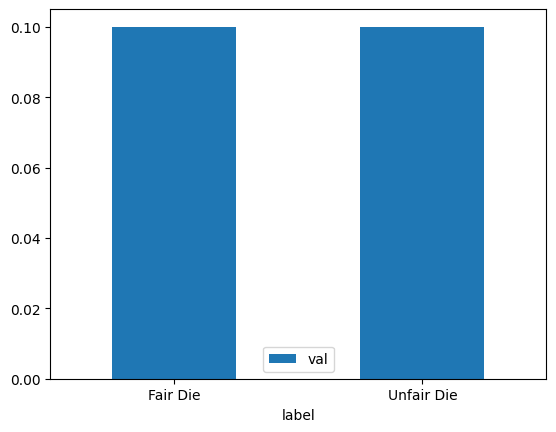

In [50]:
# Code blocks with output
fair_die = Die(np.array([1,2,3,4,5,6], dtype=np.int64))
unfair_die_1 = Die(np.array([1,2,3,4,5,6], dtype=np.int64))
unfair_die_1.change_weight('6',5.0)
unfair_die_2 = Die(np.array([1,2,3,4,5,6], dtype=np.int64))
unfair_die_2.change_weight('1',5.0)
fair_game = Game([fair_die for i in range(5)])
fair_game.play(10000)
unfair_game = Game([unfair_die_1 for i in range(2)]+[unfair_die_2 for i in range(1)]+[fair_die for i in range(2)])
unfair_game.play(10000)
fair_analyzer = Analyzer(fair_game)
unfair_analyzer = Analyzer(unfair_game)
fair_jackpot_percentage = fair_jackpoint_count/10000
unfair_jackpot_percentage = unfair_jackpoint_count/10000
df = pd.DataFrame({'label':['Fair Die', 'Unfair Die'], 'val':[fair_jackpot_percentage,unfair_jackpot_percentage]})
ax = df.plot.bar(x='label', y='val', rot=0)
fair_analyzer.combo()
print(fair_analyzer.combo_df)
unfair_analyzer.combo()
fair_combo = fair_analyzer.combo_df.reset_index(inplace=True).sort_values("count", ascending = False).set_index(inplace=True)
unfair_combo = unfair_analyzer.combo_df.reset_index(inplace=True).sort_values("count", ascending = False).set_index(inplace=True)

for i in range(10):
        fair_combo[fair_combo.index==i].plot.bat(rot=0)

## Scenario 3

In [55]:
# Code blocks with output
alphabet = Die(np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=np.str_))
alphabet.change_weight('A',8.4966)
alphabet.change_weight('B',2.0720)
alphabet.change_weight('C',4.5388)
alphabet.change_weight('D',3.3844)
alphabet.change_weight('E',11.1607)
alphabet.change_weight('F',1.8121)
alphabet.change_weight('G',2.4705)
alphabet.change_weight('H',3.0034)
alphabet.change_weight('I',7.5448)
alphabet.change_weight('J',0.1965)
alphabet.change_weight('K',1.1016)
alphabet.change_weight('L',5.4893)
alphabet.change_weight('M',3.0129)
alphabet.change_weight('N',6.6544)
alphabet.change_weight('O',7.1635)
alphabet.change_weight('P',3.1671)
alphabet.change_weight('Q',0.1962)
alphabet.change_weight('R',7.5809)
alphabet.change_weight('S',5.7351)
alphabet.change_weight('T',6.9509)
alphabet.change_weight('U',3.6308)
alphabet.change_weight('V',1.0074)
alphabet.change_weight('W',1.2899)
alphabet.change_weight('X',0.2902)
alphabet.change_weight('Y',1.7779)
alphabet.change_weight('Z',0.2722)
game = Game([alphabet for i in range(5)])
game.play(1000)
analyzer_bot = Analyzer(game)
analyzer_bot.combo()
analyzer_bot.combo_df

hello
['IN METHOD DICE LIST', <montecarlo.Die object at 0x126fea910>, <montecarlo.Die object at 0x126fea910>, <montecarlo.Die object at 0x126fea910>, <montecarlo.Die object at 0x126fea910>, <montecarlo.Die object at 0x126fea910>]
I
I
C
U
F


count
1 2 3 4 5       
A A A P N      1
    E R I      1
    G E T      1
    M T T      1
    O A W      1
...          ...
Z E E L A      1
  L E O P      1
  R S T O      1
  W A N D      1
  X K A N      1

[999 rows x 1 columns]

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [ ]:
!ls -lRF -o

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands
!pip install monte